In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tk

from scipy.optimize import fsolve

______________________________________________________________________________________________________________________________________________
# Начальные параметры
______________________________________________________________________________________________________________________________________________

Координаты точек

In [2]:
import pyproj
# Конвертация в X и Y
def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return [xy[0], xy[1]]

C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\1368368473.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\1368368473.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\1368368473.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\1368368473.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


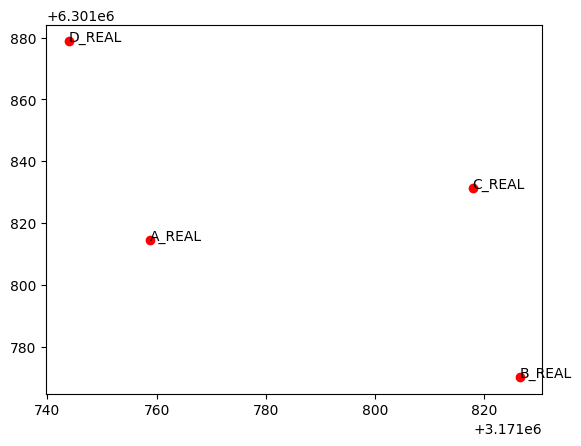

In [3]:
A_coord=[3171758.7398973103, 6301814.437391241]
calc_B=[3171802.4817291554 , 6301855.75422857]
calc_C=[3171841.94         , 6301830.99]
calc_D=[3171792.43         , 6301781.98]

STATION_3_map = lonlat_to_xy(53.208388, 50.259608)
STATION_4_map = lonlat_to_xy(53.209152, 50.259474)
STATION_5_map = lonlat_to_xy(53.208839, 50.259005)
STATION_6_map = lonlat_to_xy(53.208654, 50.260126)


plt.plot(STATION_3_map[0], STATION_3_map[1], 'ro')
plt.text(STATION_3_map[0], STATION_3_map[1]+0.1, 'A_REAL')

plt.plot(STATION_4_map[0], STATION_4_map[1], 'ro')
plt.text(STATION_4_map[0], STATION_4_map[1]+0.1, 'C_REAL')

plt.plot(STATION_5_map[0], STATION_5_map[1], 'ro')
plt.text(STATION_5_map[0], STATION_5_map[1]+0.1, 'B_REAL')

plt.plot(STATION_6_map[0], STATION_6_map[1], 'ro')
plt.text(STATION_6_map[0], STATION_6_map[1]+0.1, 'D_REAL')


A = np.array(STATION_6_map)
B = np.array(STATION_4_map)
C = np.array(STATION_5_map)
D = np.array(STATION_3_map)


#plt.plot(A_coord[0], A_coord[1], 'ro')
#plt.text(A_coord[0], A_coord[1]+0.1, 'calc_A')
#
#plt.plot(calc_B[0], calc_B[1], 'ro') 
#plt.text(calc_B[0], calc_B[1]+0.1, 'calc_B')
#
#plt.plot(calc_C[0], calc_C[1], 'ro') 
#plt.text(calc_C[0], calc_C[1]+0.1, 'calc_C')
#
#plt.plot(calc_D[0], calc_D[1], 'ro') 
#plt.text(calc_D[0], calc_D[1]+0.1, 'calc_D')


plt.show()

In [4]:
# A = np.array([1, 3])
# B = np.array([3, 4])
# C = np.array([4, 1])
# D = np.array([0, 2])



point_list = [A,B,C,D]
point_list

[array([3171743.9124932 , 6301878.77612708]),
 array([3171817.86552491, 6301831.27746316]),
 array([3171826.49953741, 6301770.12313139]),
 array([3171758.73989731, 6301814.43739124])]

Вектор AB

In [5]:
vec_AB = np.array([B[0]-A[0], B[1]-A[1]])
vec_AB

array([ 73.95303171, -47.49866392])

Вычисление растояний между точками

In [6]:

AB = BA = np.linalg.norm(A-B)

BC = CB = np.linalg.norm(C-B)

CD = DC = np.linalg.norm(C-D)

AC = CA = np.linalg.norm(C-A)

DA = AD = np.linalg.norm(A-D)

BD = DB = np.linalg.norm(B-D)

point_len_list = [AB, BA, BC, CB, CD, DC, DA, AD]

point_len_list

[np.float64(87.89296885133827),
 np.float64(87.89296885133827),
 np.float64(61.76081659056897),
 np.float64(61.76081659056897),
 np.float64(80.96371072064974),
 np.float64(80.96371072064974),
 np.float64(66.02518338847916),
 np.float64(66.02518338847916)]

In [7]:
print(AB)
print(AC)
print(BC)
print(AD)
print(BD)

87.89296885133827
136.4774462843941
61.76081659056897
66.02518338847916
61.477051502403114


Text(0.5, 1.0, 'Расположение заданных точек')

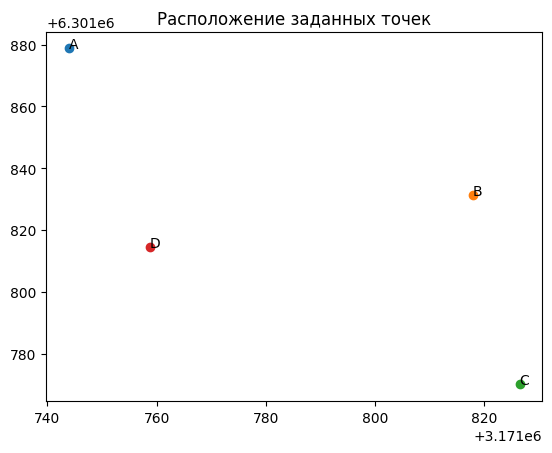

In [8]:
plt.scatter(A[0], A[1])
plt.text(A[0], A[1]+0.005, 'A')

plt.scatter(B[0], B[1])
plt.text(B[0], B[1]+0.005, 'B')

plt.scatter(C[0], C[1])
plt.text(C[0], C[1]+0.005, 'C')

plt.scatter(D[0], D[1])
plt.text(D[0], D[1]+0.005, 'D')

plt.title('Расположение заданных точек')

_______________________________________________________________________________________________________________________________________________
# Решение Гипотезы №1 (УСПЕХ)
Дано: координаты точки А
Растояния: AB, BA, BC, CB, CD, DC, AD, DA
Вектор: AB


Гипотеза:
Зная вектор AB, устанавливаем координаты точки B, далее через системы уравнений находим решения для точки C и D
_______________________________________________________________________________________________________________________________________________

Высчитываем координаты точки B (через вектор)

In [9]:


calc_B = [vec_AB[0] + A[0], vec_AB[1] + A[1]]
calc_B

[np.float64(3171817.8655249085), np.float64(6301831.277463161)]

Проверка на совпадение координаты B

In [10]:
print('Имеется ли совпадение по координате B: ')
if list(calc_B) == list(B):
    print('✅')
else:
    print('❌')

Имеется ли совпадение по координате B: 
✅


Решение системы относительно для координаты C

In [11]:
def equations(vars):
    x, y = vars
    eq1 = (x-A[0])**2 + (y - A[1])**2 - AC**2  #x**2 + y**2 - 25
    eq2 = (x-calc_B[0])**2 + (y - calc_B[1])**2 - BC**2
    return [eq1, eq2]

initial_guess = [1, 1]
calc_C = np.round(fsolve(equations, initial_guess), 2)
print("Координаты точки C:", calc_C)

Координаты точки C: [3171826.5  6301770.12]


Проверка на совпадение координаты C

In [12]:
if list(calc_C) == list(C):
    print('✅')
else:
    print('❌')
    print(f'Получили {calc_C}')
    print(f'Нужное {C}')

❌
Получили [3171826.5  6301770.12]
Нужное [3171826.49953741 6301770.12313139]


Решение системы относительно для координаты D

In [13]:
def equations(vars):
    x, y = vars
    eq1 = (x-A[0])**2 + (y - A[1])**2 - AD**2
    eq2 = (x-calc_B[0])**2 + (y - calc_B[1])**2 - BD**2
    return [eq1, eq2]

initial_guess = [1, 1]
calc_D = np.round(fsolve(equations, initial_guess), 2)
print("Координаты точки D:", calc_D)

Координаты точки D: [3171758.74 6301814.44]


Имеется ли совпадение по координате D

In [14]:
if list(calc_D) == list(D):
    print('✅')
else:
    print('❌')
    print(f'Получили {calc_D}')
    print(f'Нужное {D}')

❌
Получили [3171758.74 6301814.44]
Нужное [3171758.73989731 6301814.43739124]


Text(0.5, 1.0, 'Расположение расчетных точек')

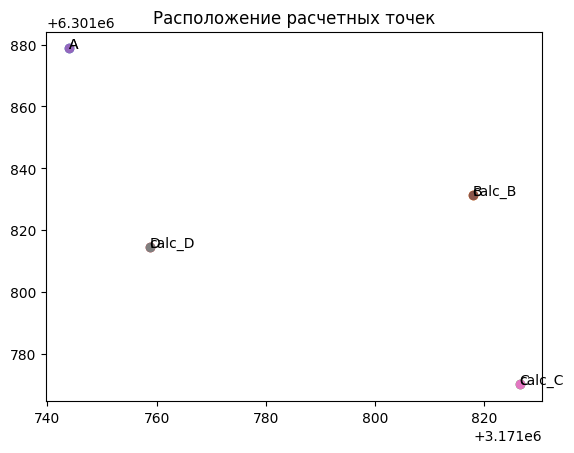

In [15]:
plt.scatter(A[0], A[1])
plt.text(A[0], A[1]+0.005, 'A')

plt.scatter(calc_B[0], calc_B[1])
plt.text(calc_B[0], calc_B[1]+0.005, 'calc_B')

plt.scatter(calc_C[0], calc_C[1])
plt.text(calc_C[0], calc_C[1]+0.005, 'calc_C')

plt.scatter(D[0], D[1])
plt.text(calc_D[0], calc_D[1]+0.005, 'calc_D')


plt.scatter(A[0], A[1])
plt.text(A[0], A[1]+0.005, 'A')

plt.scatter(B[0], B[1])
plt.text(B[0], B[1]+0.005, 'B')

plt.scatter(C[0], C[1])
plt.text(C[0], C[1]+0.005, 'C')

plt.scatter(D[0], D[1])
plt.text(D[0], D[1]+0.005, 'D')

plt.title('Расположение расчетных точек')

In [17]:
import folium
# Конвертация в долготы и широты
def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]


A_m = xy_to_lonlat(A_coord[0], A_coord[0])
B_m = xy_to_lonlat(calc_B[0], calc_B[1])
C_m = xy_to_lonlat(calc_C[0], calc_C[1])
D_m = xy_to_lonlat(calc_D[0], calc_D[1])

map = folium.Map(location=(53.208388, 50.259608), zoom_start=100)

STATION_3_map = [53.208388, 50.259608]
STATION_4_map = [53.209152, 50.259474]
STATION_5_map = [53.208839, 50.259005]
STATION_6_map = [53.208654, 50.260126]


folium.Marker(A_m, '6').add_to(map)
folium.Marker(B_m, '4').add_to(map)
folium.Marker(C_m, '5').add_to(map)
folium.Marker(D_m, '3').add_to(map)


# folium.Marker(STATION_6_map, 'real 6').add_to(map)
# folium.Marker(STATION_4_map, 'real 4').add_to(map)
# folium.Marker(STATION_5_map, 'real 5').add_to(map)
# folium.Marker(STATION_3_map, 'real 3').add_to(map)

map.save("test123.html")

C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\3388077717.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\3388077717.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\3388077717.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
C:\Users\kolyagin\AppData\Local\Temp\ipykernel_16168\3388077717.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


# Конец